# **Simple Linear Regression**
- Simple Linear Regression is a statistical method that allows us to summarize and study relationships between two (quantitative) variables.
- Assumptions: SLR assumes that there is a linear relationship between X and Y, meaning Y can be expressed as a linear combination of X with some noise or error

## Equation of the Line
The equation of a simple linear regression line can be written as:

y = (m * x) + b

where:
- m : Slope
- x : input
- y : output
- b : y_intercept

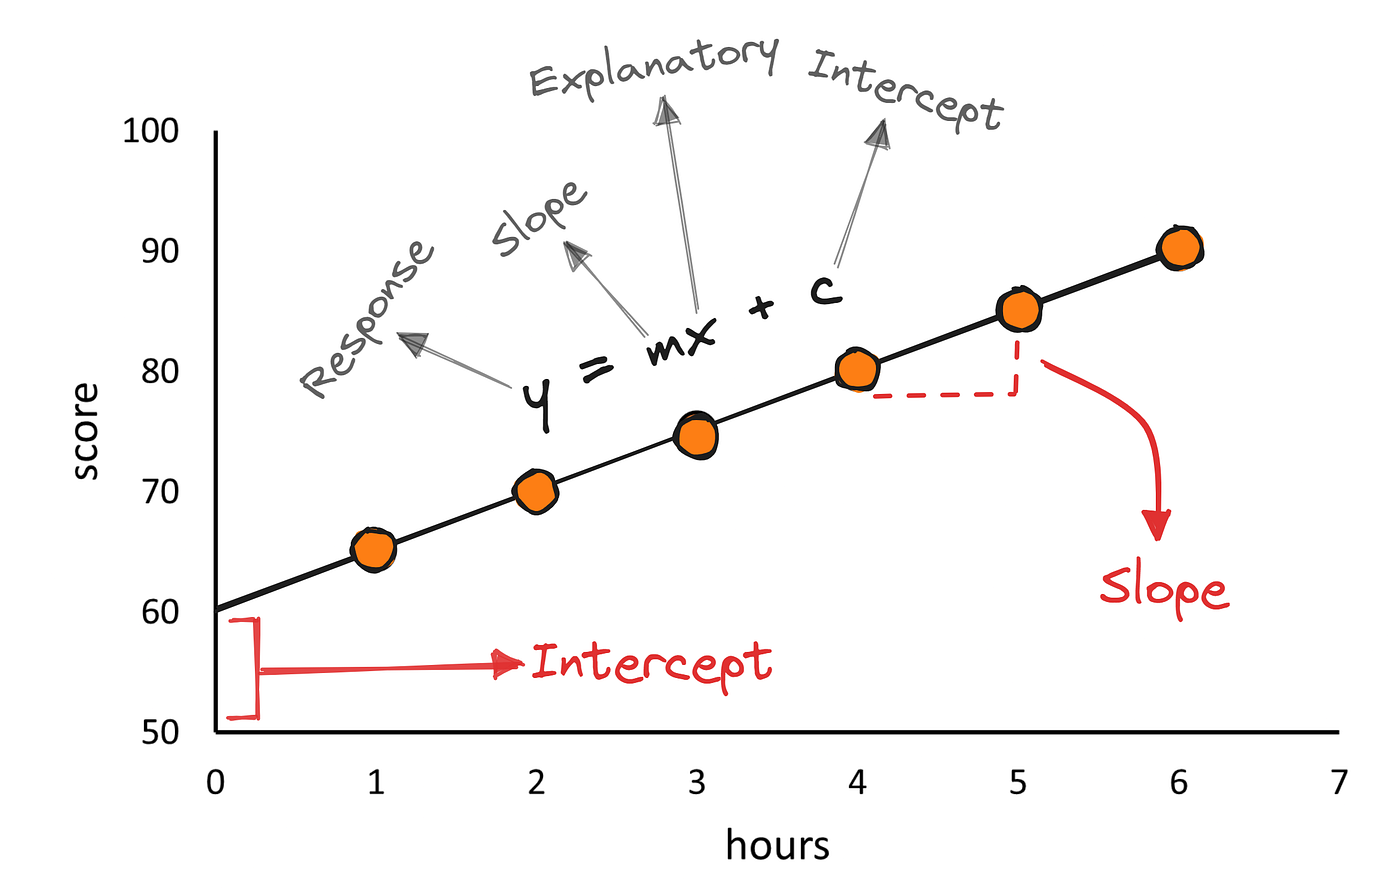

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading Dataset

In [2]:
dataset = load_diabetes(as_frame = True)
df = dataset['data'].loc[:, ['s1',	's2', 's3', 's4', 's5']]
df['target'] = dataset['target']
df.head()

,s1,s2,s3,s4,s5,target
0,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,151.0
1,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,75.0
2,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,141.0
3,0.012191,0.024991,-0.036038,0.034309,0.022688,206.0
4,0.003935,0.015596,0.008142,-0.002592,-0.031988,135.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      442 non-null    float64
 1   s2      442 non-null    float64
 2   s3      442 non-null    float64
 3   s4      442 non-null    float64
 4   s5      442 non-null    float64
 5   target  442 non-null    float64
dtypes: float64(6)
memory usage: 20.8 KB


## Pair Plot

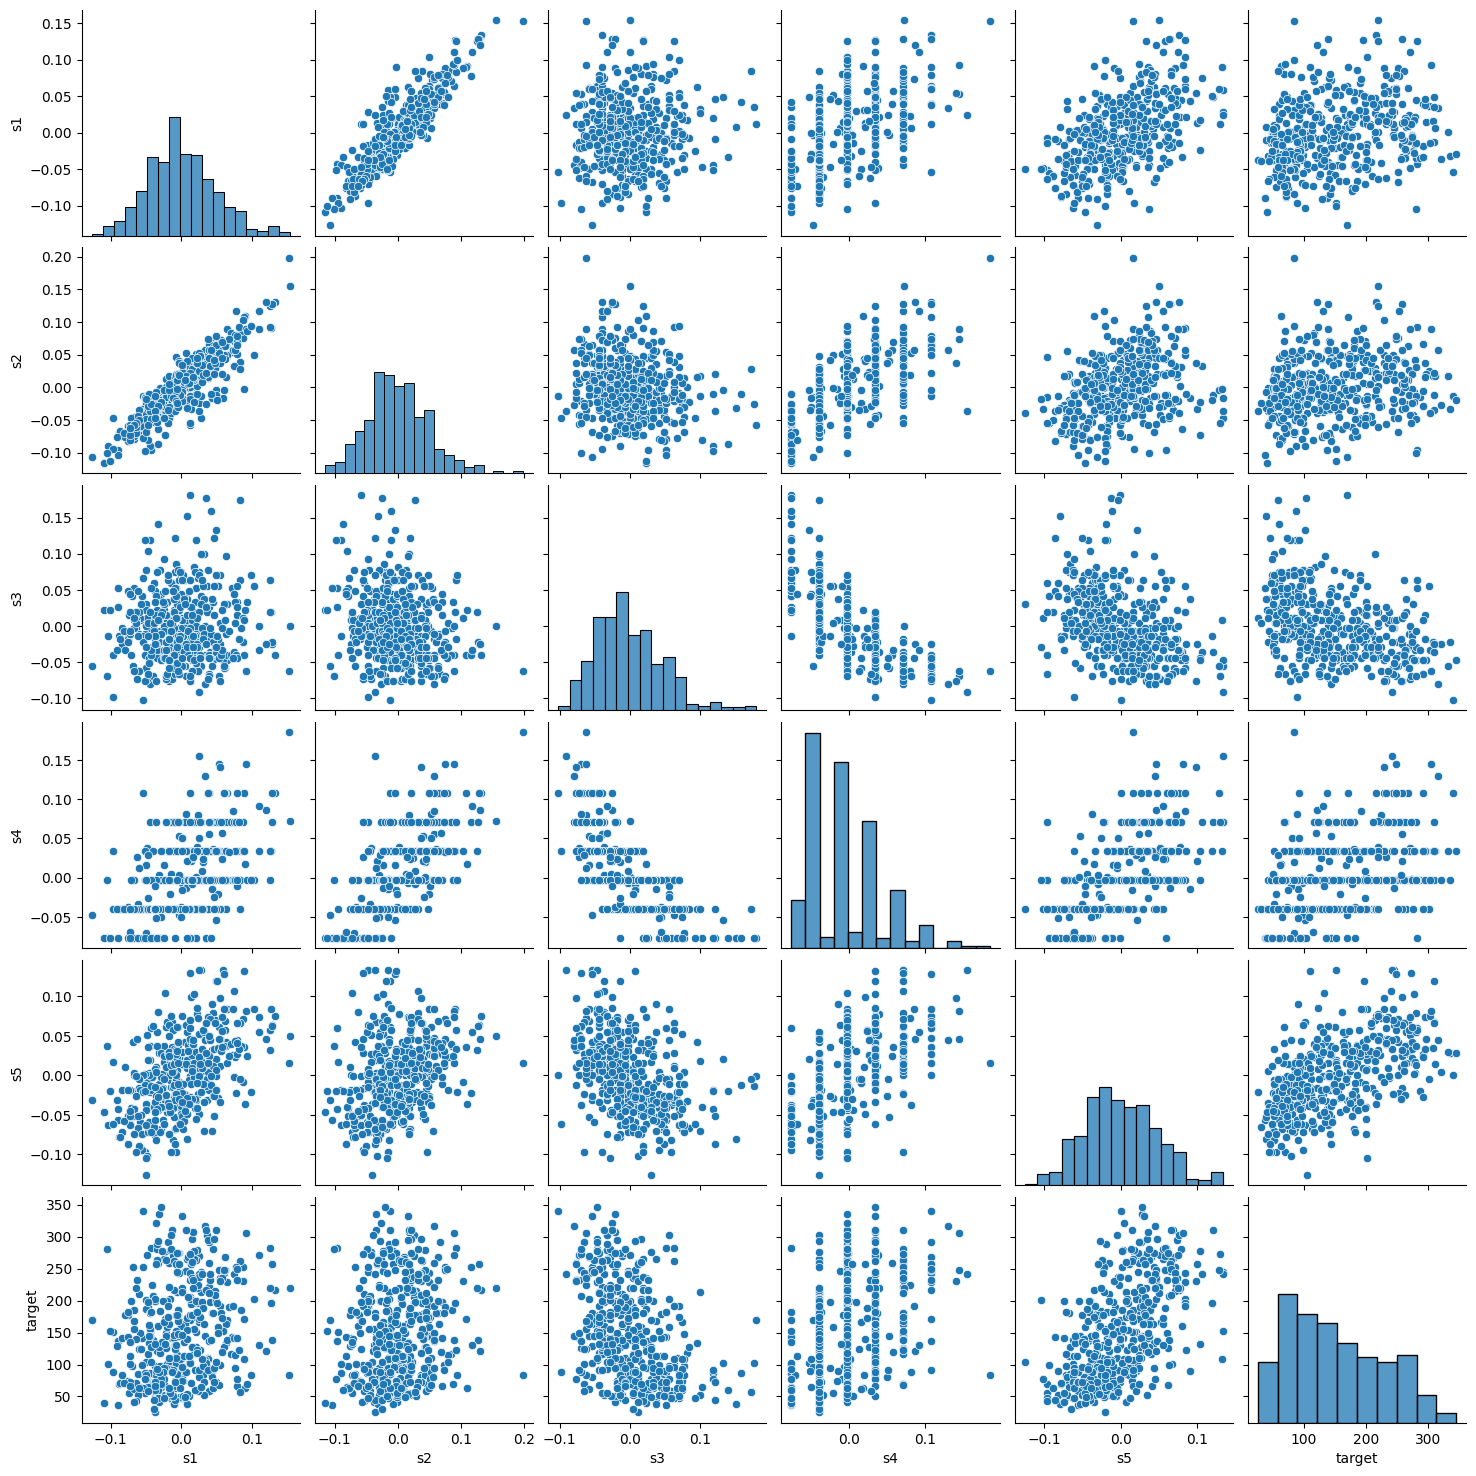

In [6]:
sns.pairplot(df)
plt.show()

## Applying Linear Regression on S5(input) column and target(output) columns

In [4]:
X = np.array(df.loc[:,'s5']).reshape(-1, 1)
y = np.array(df['target'])

## Splitting training and testing data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# **LinearRegression - sklearn class**
Hyperparameters - 
- fit_intercept : If set to False, no intercept will be used in calculations
- n_jobs : no. of CPU cores
- copy_X : If True, X will be copied; else, it may be overwritten.
- positive : When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

In [6]:
lr = LinearRegression(fit_intercept = True, n_jobs = 5, copy_X = False, positive = False)

In [7]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=False, n_jobs=5)

## Weight and Bias

In [8]:
print(lr.coef_)
print(lr.intercept_)

[945.61313607]
150.73681754198003


## Plotting The Best Fit Line

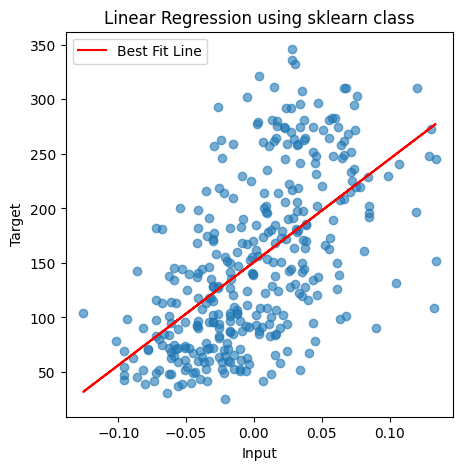

In [9]:
plt.figure(figsize = (5,5))
plt.scatter(X_train, y_train, alpha = 0.6)
plt.plot(X_train, lr.coef_[0] * X_train + lr.intercept_, color = 'red', label = 'Best Fit Line')
plt.legend(loc = 'upper left')
plt.title("Linear Regression using sklearn class")
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

## Model Prediction and calculating accuracy (r2_score)

In [10]:
y_pred = lr.predict(X_test)

In [11]:
r2_score(y_test, y_pred)

0.22527786743609446

# **Creating Simple Linear Regression Class**
Using Ordinary Least Square Estimation
- The slope (m) can be calculated using the formula:
  - m = sum[(y - y_mean) * (x - x_mean) / (x - x_mean)^2**]


- The y-intercept (b) can be calculated using the formula:
  - b = mean(Y) - m × mean(X)

In [12]:
class simple_linear_regression:
    def __init__(self) -> None:
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        X_train = X_train.ravel()
        # slope(m) calculation - OLS
        self.m = ((X_train - X_train.mean()) * (y_train - y_train.mean())).sum() / ((X_train - X_train.mean()) ** 2).sum()

        # y-intercept(b) calculation - OLS
        self.b = y_train.mean() - (self.m * X_train.mean())

    def predict(self, X_test):
        predicted_values = (self.m * X_test) + self.b
        return predicted_values

In [13]:
# Object Creation
slr = simple_linear_regression()
slr.fit(X_train, y_train)

## Weight and Bias

In [14]:
print(slr.m)
print(slr.b)

945.6131360690342
150.45892351274787


## Plotting Best Fit Line

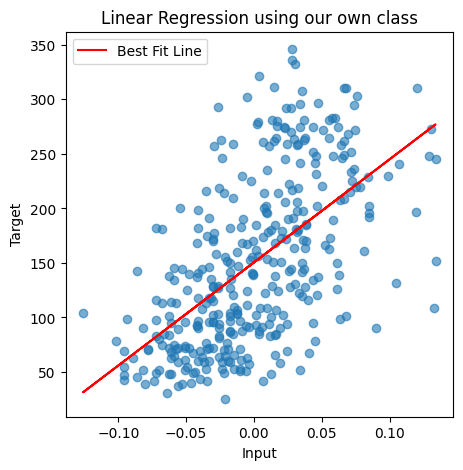

In [15]:
plt.figure(figsize = (5,5))
plt.scatter(X_train, y_train, alpha = 0.6)
plt.plot(X_train, slr.m * X_train + slr.b, color = 'red', label = 'Best Fit Line')
plt.legend(loc = 'upper left')
plt.title("Linear Regression using our own class")
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

In [16]:
y_pred = slr.predict(X_test)

# **Regression Metrics**
- mean_absolute_error
- mean_squared_error
- root_mean_squared_error
- r2_score
- adjusted_r2_score = 1 - [(1 - r2_score) * (n - 1) / (n - 1 - k)] where (n = no.rows, k = no. input columns)

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (((1 - r2) * (y_test.shape[0] - 1)) / (y_test.shape[0] - 1 - 1))

print(mae, mse, rmse, r2, adj_r2, sep = '\n')

53.71962384600614
4284.398362580762
65.45531577023185
0.22456615766413313
0.2156531249936059


# **Simple Linear Regression using Gradient Descent**
**xt+1 = xt - η∆xt**

Where:
- xt is the current estimate of the parameters
- xt+1 is the updated estimate of the parameters
- η is the learning rate, which controls the step size of each update
- ∆xt is the direction of descent, which is the negative gradient of the cost function with respect to the parameters xt

My GD Notebook - https://www.kaggle.com/code/shriramvibhute/gradient-descent-batch-stochastic-mini-batch

## The Learning Rate and No. of Epochs are Hyperparameters

In [18]:
# Here i used the solver - Mean Squared error

class GDRegressor:
    def __init__(self, lr, epochs):
        self.coef_ = None
        self.intercept_ = None

        # Hyperparameters
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X_train, y_train):
        X_train = X_train.ravel()
        # Generally the random values of m(coef) and b(intercept) are
        self.coef_ = 1
        self.intercept_ = 0

        for i in range(self.epochs):
            y_hat = (self.coef_ * X_train + self.intercept_)

            # Calculating intercept
            intercept_der = -2 * np.sum(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            # Calculating slopes
            coef_der = -2 * np.dot((y_train - y_hat), X_train)
            self.coef_ = self.coef_ - (self.lr * coef_der)
    
    def predict(self, X_test):
        return self.coef_ * X_test + self.intercept_

In [19]:
gdr = GDRegressor(0.002, 3000)

In [20]:
gdr.fit(X_train, y_train)

## Slope and Intercept

In [21]:
print(gdr.coef_)
print(gdr.intercept_)

945.5554422079728
150.45892351274787


## Best Fit Line

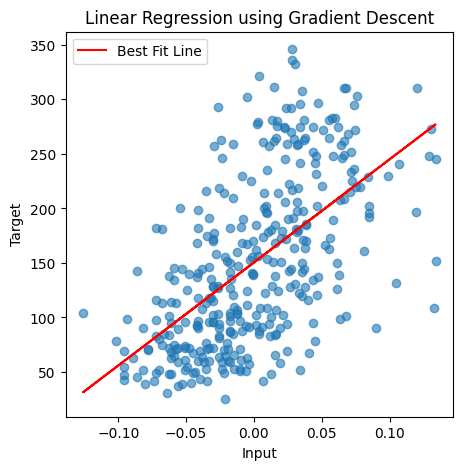

In [22]:
plt.figure(figsize = (5,5))
plt.scatter(X_train, y_train, alpha = 0.6)
plt.plot(X_train, gdr.coef_ * X_train + gdr.intercept_, color = 'red', label = 'Best Fit Line')
plt.legend(loc = 'upper left')
plt.title("Linear Regression using Gradient Descent")
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

## Model Prediction and r2_score

In [23]:
y_pred = gdr.predict(X_test)

In [24]:
r2_score(y_test, y_pred)

0.2245730661455887